In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
url = 'C:\\Users\\shail\\Downloads\\house_rental_data.csv.txt'
data = pd.read_csv(url)
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [41]:
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [42]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [43]:
data.shape

(645, 7)

In [44]:
data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [45]:
data.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [47]:
data.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

<Axes: >

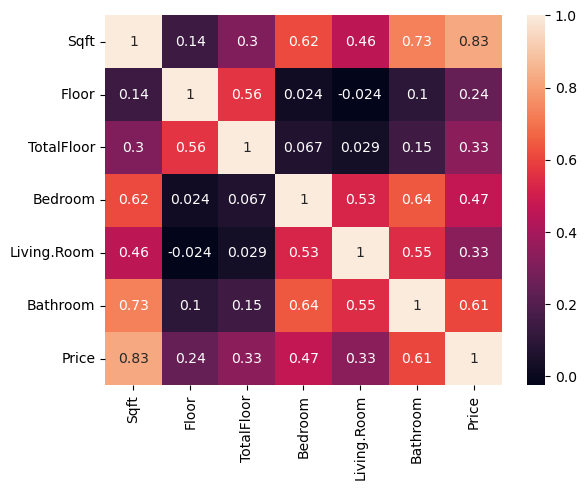

In [50]:
#corr = house_data.heatmap
corr = data.corr()
sns.heatmap(corr, annot = True)

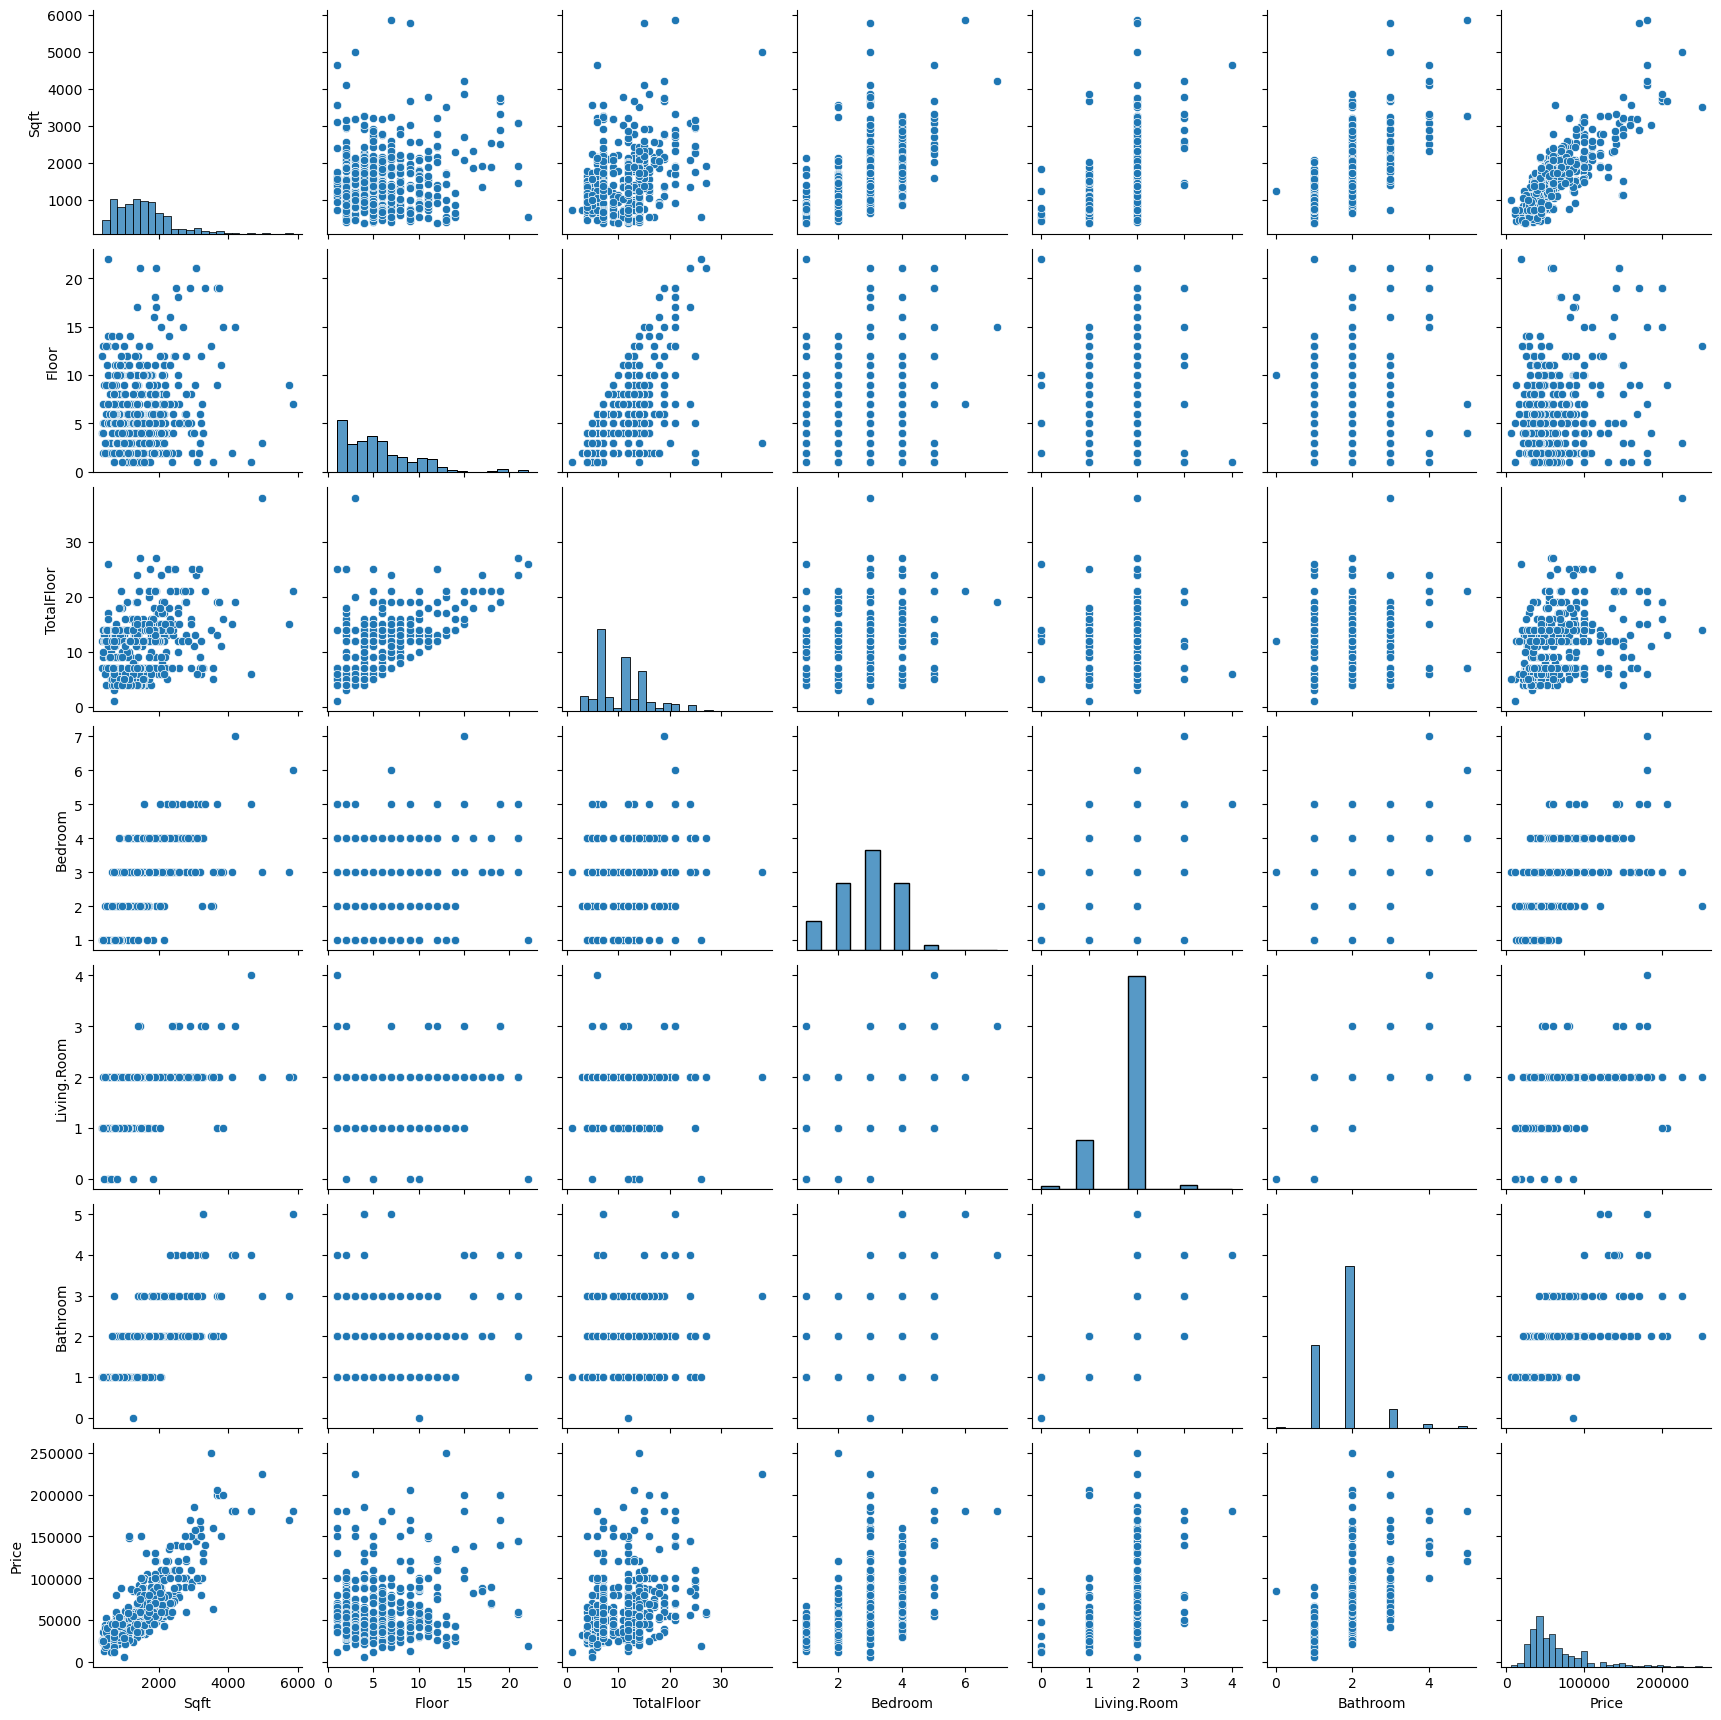

In [52]:
sns.pairplot(data)

In [54]:
# split X and y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [55]:
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [56]:
# Apply knn
from sklearn.neighbors import KNeighborsRegressor
nn_model = KNeighborsRegressor(n_neighbors = 2)
nn_model.fit(X_train,y_train)
y_pred = nn_model.predict(X_test)

In [57]:
#Better value for k
from sklearn.neighbors import KNeighborsRegressor
value_k = []

for k in range(2, 11):
    nn_model = KNeighborsRegressor(n_neighbors = k)
    nn_model.fit(X_train, y_train)
    y_predict = nn_model.predict(X_test)
    value_k.append({k,nn_model.score(X_train,y_train),nn_model.score(X_test, y_test)})
   

In [58]:
value_k


[{0.8073986336879302, 0.9036537890690408, 2},
 {0.8276192755540703, 0.8397161158592596, 3},
 {0.7987720735579404, 0.8156143298313938, 4},
 {0.7718504187044848, 0.7931381834591736, 5},
 {0.7604758820468766, 0.7713484819177155, 6},
 {0.7572910111929974, 0.7622982183338864, 7},
 {0.7531967728969883, 0.7564912724315853, 8},
 {0.7463251718194402, 0.7502205535967417, 9},
 {0.7438128418736436, 0.7541003322052189, 10}]

In [ ]:
# Best - 90% for k = 2 